In [1]:
%matplotlib notebook
%pylab

from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags, tril,diags

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Exact solution : u(x)
def u(x):
    u = sin(2*pi*x)
    return u

# u''(x)
def upp(x):
    upp = -(2*pi)**2*sin(2*pi*x)
    return upp

# RHS
def f(x):
    f = upp(x)
    return f

In [3]:
# Gauss-seidel
def gauss_seidel(A,F,kmax,tol):
    P = tril(A)  
    Q = P - A      # A = P-Q
    PinvQ = spsolve(P,Q)
    Pinvb = spsolve(P,F)
    
    uk = zeros(F.shape)
    e = []
    print("Gauss Seidel")
    for k in range(0,kmax):
        ukp1 = PinvQ*uk + Pinvb
        e = e + [norm(uk-ukp1)]
        print("%5d %12.4e" %(k,e[k]))
        if e[k] < tol:
            break
        uk = ukp1
            
    return ukp1,e

In [4]:
# Jacobi iteration
def jacobi_solve(A,F,kmax,tol):
    P = diags(A.diagonal(),format='csc')
    Q = P - A
    PinvQ = spsolve(P,Q)
    Pinvb = spsolve(P,F)
    
    uk = zeros(F.shape) 
    e = []
    print("Jacobi solve")
    for k in range(0,kmax):
        ukp1 = PinvQ@uk + Pinvb
        e = e + [norm(uk-ukp1)]
        #print("%5d %12.4e" % (k,e[k]))
        if e[k] < tol:
            break
        uk = ukp1
            
    return ukp1,e
        
        


In [5]:
# General splitting method
def splitting(A,M,F,kmax,tol):
    uk = zeros(F.shape)
    rk = F - A@uk
    zk = spsolve(M,rk)
    e = []
    print("Splitting solve")
    for k in range(0,kmax):
        ukp1 = uk + zk
        e = e + [norm(zk)]
        # print("%5d %12.4e" %(k,e[k]))
        if e[k] < tol:
            break

        rk = F - A@ukp1     # matrix vector multiply
        zk =  spsolve(M,rk)
        uk = ukp1
        
            
    return ukp1,e
        

In [11]:
N = 20
xlong = linspace(0,1,N+1)
x = reshape(xlong[1:-1],(N-1,1))  # remove entries 0 and N+1; reshape vector.
h = 1.0/N
    
z = ones(N-1)
A = spdiags([z,-2*z,z],[-1,0,1],N-1,N-1,format='csc')  # sparse storage
    
# Boundary conditions    
bc = zeros((N-1,1))    # "tuple" (N-1,1) describes shape of the array.
bc[0] = u(0)
bc[-1] = u(1)           # Use -1 to assign to last entry
    
F = h**2*f(x) - bc

kmax = 10000
tol = 1e-12

M = diags(A.diagonal(),format='csc')
U,E_splitting = splitting(A,M,F,kmax,tol)

U_jacobi,E_jacobi = jacobi_solve(A,F,kmax,tol)    

Splitting solve
Jacobi solve


<IPython.core.display.Javascript object>


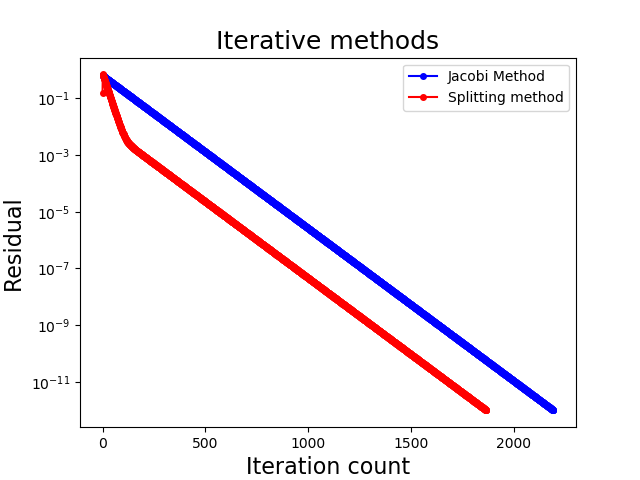

In [12]:
figure(1)
clf()

semilogy(E_jacobi,'b.-',markersize=8, label='Jacobi Method')
semilogy(E_splitting,'r.-',markersize=8, label='Splitting method')

title('Iterative methods',fontsize=18)
xlabel('Iteration count',fontsize=16)
ylabel('Residual',fontsize=16)

legend()
show()

In [ ]:
dir(F)